# Урок 2. Метрики качества классификации ч.1

В уроке мы разбирали матрицу ошибок и некоторые метрики, основанные на терминах матрицы ошибок. Здесь же посмотрим, как эти метрики применять на практике и что  по ним можно выяснить.

### 1.1
Выкачайте тренировочный датасет Titanic - train.csv - с сайта [kaggle](https://www.kaggle.com/c/titanic/data). С помощью функции pd.read_csv() загрузите данные в датафрейм. Выведите первые 20 строк и проанализируйте данные: какие колонки присутствуют (более конкретная информация по ним есть на сайте kaggle), каким образом в них обозначены данные и какие типы данных используются (используйте pandas.dtypes). 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")
df.columns = df.columns.map(lambda x: x.lower())
df.head(20)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
print(df.dtypes, df.size, df.shape, sep='\n\n')

passengerid      int64
survived         int64
pclass           int64
name            object
sex             object
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked        object
dtype: object

10692

(891, 12)


In [4]:
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.describe(exclude=np.number)

,name,sex,ticket,cabin,embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"West, Miss. Constance Mirium",male,347082,G6,S
freq,1,577,7,4,644


### 1.2
Проверьте, имеются ли пропущенные значения в колонках, и выведите сумму всех пропущенных значений в каждой из колонок.

In [6]:
df.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

### 1.3
Замените все пропущенные значения колонки Age на медианы в зависимости от пола человека: т.е. если пол человека в строке с пропущенным значением "male", заменяете пропущенное значение возраста на медиану по всем известным возрастам мужчин, и наоборот. Выведите медианы возраста в зависимости от пола. Пропущенные значения колонок Cabin и Embarked замените на U (Unknown).

Примечание: для группировки по полу можно использовать метод df.groupby(), который имеет встроенные агрегатные функции (в т.ч. для вычисления медианы).  Для установки пропущенных значений в датасете воспользуйтесь функцией df.apply().

In [7]:
avg_age_by_sex = df.groupby('sex')['age'].mean().round(1)
print(avg_age_by_sex)

sex
female    27.9
male      30.7
Name: age, dtype: float64


In [8]:
def replace_age(row):
    if row.sex == 'male':
        return avg_age_by_sex.male
    else:
        return avg_age_by_sex.female

---
**Никак не смог решить задачу по замене ` NaN ` в столбце ` age ` напрямую.
Либо остальные значения менялись на ` NaN `, либо все значения менялись на средние.**

**Объясните, пожалуйста, в чём я ошибаюсь?!**

---

In [9]:
# df['new_age'] = df[df.age.isna()].apply(lambda row: avg_age_by_sex.male if row.sex == 'male' else avg_age_by_sex.female, axis=1)
# df.head(20)

In [10]:
# df['new_age'] = df.apply(lambda row: row.age if isinstance(row.age, np.float64) else
#                          (
#                              avg_age_by_sex.male if row.sex == 'male' else avg_age_by_sex.female
#                          )
#                         , axis=1)
# df.head(20)

In [11]:
df.age.fillna(0, inplace=True)
df['age'] = df.apply(lambda row: row.age if row.age else replace_age(row), axis=1)

### 1.4
Выведите возраст пассажиров с PassengerID = [6, 20]. Убедитесь, что заполнены все пропущенные значения (воспользуйтесь функцией df.isnull() ).

In [12]:
df[df.passengerid.isin([6, 20])][['passengerid', 'age']]

,passengerid,age
5,6,30.7
19,20,27.9


In [13]:
df[['cabin', 'embarked']] = df[['cabin', 'embarked']].fillna('U')
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S


Так как не все классификаторы могут работать с категориальными признаками, в данном случае необходимо заменить их на числовые.

Также можно было бы выделить расширенные признаки, такие как статус пассажира (Mr., Mrs., Miss., Dr., Master. и т.д.), собственный индекс билета, индекс палубы и другие, но здесь ограничимся выбором более простых признаков.

### 1.5
В колонке Sex замените значения на 0, если пол "male", и на 1, если "female". В колонке Embarked замените параметры "U", "S", "C", "Q" на 0, 1, 2, 3 соответственно. Отбросьте колонки PassengerId, Name, Ticket, Cabin. Выведите первые 20 строк получившегося набора данных.

In [14]:
port_name = {x: y for x, y in zip(("U", "S", "C", "Q"), (0, 1, 2, 3))}

In [15]:
df['sex'] = df.sex.apply(lambda x: 0 if x == 'male' else 1)

df['embarked'] = df.embarked.apply(lambda x: port_name[x])

df = df.drop(columns=['passengerid', 'name', 'ticket', 'cabin'])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


### 1.6
Приступим к построению классификаторов. **Условимся, что, если функция или объект модели имеют параметр random_state, то устанавливаем его равным 17 в каждом из случаев.**

Разделите данные на тренировочный и тестовый датасеты, установив размер тестового как 0.25 (первая колонка Survived является целевой, поэтому необходимо сначала ее отделить от признаков).

In [16]:
from sklearn.model_selection import train_test_split 

In [17]:
X = df.iloc[:, 1:]
y = df['survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

### 1.7
Обучите на полученных выборках несколько классификаторов, которые импортированы ниже.

**Примечание: в методе ближайших соседей используйте количество соседей, равное 5.**

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [19]:
k_neighbors = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
k_neighbors_prediction = k_neighbors.predict(X_test)

In [20]:
gaussian = GaussianNB().fit(X_train, y_train)
gaussian_prediction = gaussian.predict(X_test)

In [21]:
tree = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)
tree_prediction = tree.predict(X_test)

In [22]:
logistic_reg = LogisticRegression(max_iter=1000, random_state=17).fit(X_train, y_train)
logistic_reg_prediction = logistic_reg.predict(X_test)

In [23]:
logistic_reg

LogisticRegression(max_iter=1000, random_state=17)

Очевидно, в этом случае использовать метрику accuracy, которую мы применяли до этого, не совсем правильно: она не даст верную оценку классификатору, потому как выживших явно меньше, чем погибших.

Вспомним про такие метрики как точность и полнота. Здесь они подойдут хорошо, так как у нас имеются положительный и отрицательный классы, и определить корректно один из них может оказаться более важным .

### 1.8
В каждом из пунктов следующего теста выберите, что важнее максимизировать: точность (precision) или полноту (recall). Выпишите ответы.

1. Вероятность того, что при определенной поломке самолета он сможет долететь до пункта назначения (1 - долетел, 0 - не долетел).
2. Предсказание, представляет ли человек опасность, по анализу психического состояния (1 - представляет опасность, 0 - не представляет опасности).
3. Предсказание ухода клиента (1 - клиент ушел, 0 - остался).
4. Выявление рака на основе медицинских показателей (1 - болен раком, 0 - здоров).
5. Предсказание летальности при наблюдаемой мутации (1 - выживание, 0 - летальный исход).
6. Определение важности происшествия для экстренных служб (1 - важно, 0 - неважно).
7. Окупятся ли вложения в бизнес (1 - окупятся, 0 - не окупятся).

Ваш ответ:

1. точность<br>
2. полнота<br>
3. полнота<br>
4. полнота<br>
5. точность<br>
6. полнота<br>
7. точность<br>

### 1.9
Определите, что важнее использовать в случае датасета Titanic: полноту или точность. Объясните, почему.

### 1.10
Для каждого классификатора выведите матрицу ошибок и самостоятельно рассчитайте метрику recall (расчеты должны присутствовать). Проверьте расчеты, воспользовавшись встроенной метрикой recall_score.

$
Recall = \frac{TP}{TP + FN}
$

In [24]:
from sklearn.metrics import confusion_matrix, recall_score

In [25]:
models = (k_neighbors, gaussian, tree, logistic_reg)
for model in models:
    prediction = model.predict(X_test)
    matrix = confusion_matrix(y_test, prediction)
    recall = matrix[0][0]/(matrix[0][0] + matrix[1][0])
    print(model, matrix, f"recall calculated = \t\t{recall}", sep='\n\n')
    print(f"recall_score function = \t{recall_score(y_test, prediction)}")
    print('-' * 50, '\n')

KNeighborsClassifier()

[[113  18]
 [ 47  45]]

recall calculated = 		0.70625
recall_score function = 	0.4891304347826087
-------------------------------------------------- 

GaussianNB()

[[111  20]
 [ 27  65]]

recall calculated = 		0.8043478260869565
recall_score function = 	0.7065217391304348
-------------------------------------------------- 

DecisionTreeClassifier(random_state=17)

[[110  21]
 [ 26  66]]

recall calculated = 		0.8088235294117647
recall_score function = 	0.717391304347826
-------------------------------------------------- 

LogisticRegression(max_iter=1000, random_state=17)

[[113  18]
 [ 28  64]]

recall calculated = 		0.8014184397163121
recall_score function = 	0.6956521739130435
-------------------------------------------------- 



### 1.11
Выберите ту модель, на которой метрика recall давала лучший ответ, и рассчитайте для нее precision, используя встроенную функцию.

In [26]:
from sklearn.metrics import precision_score

In [27]:
precision_score(y_test, tree_prediction)

0.7586206896551724

# Урок 4. Метрики качества классификации ч.2

Продолжим работу с метриками классификации. В предыдущем задании мы разобрали матрицу ошибок и две основные метрики, которые используются при бинарной классификации.

Сейчас рассмотрим F-меру - совокупную метрику по precision и recall - и более сложную AUC-ROC.

### 2.1
Из задания к предыдущему уроку выберите классификатор, который давал наименьшее значение recall, вычислите для него precision, применив precision_score, и самостоятельно посчитайте F1-меру (расчеты должны присутствовать). Затем проверьте ответ, используя встроенную функцию.

Сравните полученную f1-меру со значением среднего арифметического полноты и точности.

In [28]:
from sklearn.metrics import precision_score, f1_score

$$
F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\beta^2 \cdot precision + recall}
$$

In [29]:
k_neighbors_precision = precision_score(y_test, k_neighbors_prediction)
print(f"k_neighbors_precision = {k_neighbors_precision}")

k_neighbors_recall = 0.70625
f1_calc = (1 + 1 ** 2) * k_neighbors_precision * k_neighbors_recall \
            /(1 ** 2 * k_neighbors_precision + k_neighbors_recall)
print(f"f1 calculated = {f1_calc}")

f1_metric = f1_score(y_test, k_neighbors_prediction)
print(f"f1 metric = {f1_metric}")

k_neighbors_precision = 0.7142857142857143
f1 calculated = 0.7102451288497802
f1 metric = 0.5806451612903226


В библиотеке sklearn есть удобная функция classification_report, возвращающая precision, recall, F-меру и количество экземпляров каждого класса в удобном для чтения формате. Также существует функция precision_recall_fscore_support, возвращающая те же самые метрики, но в форме массива.

### 2.2
Для каждого классификатора из предыдущего урока рассчитайте и выведите следующие импортированные метрики.

In [30]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [31]:
precision_recall_fscore_support(y_test, k_neighbors_prediction)

(array([0.70625   , 0.71428571]),
 array([0.86259542, 0.48913043]),
 array([0.7766323 , 0.58064516]),
 array([131,  92]))

In [32]:
print(classification_report(y_test, k_neighbors_prediction))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       131
           1       0.71      0.49      0.58        92

    accuracy                           0.71       223
   macro avg       0.71      0.68      0.68       223
weighted avg       0.71      0.71      0.70       223



In [33]:
precision_recall_fscore_support(y_test, gaussian_prediction)

(array([0.80434783, 0.76470588]),
 array([0.84732824, 0.70652174]),
 array([0.82527881, 0.73446328]),
 array([131,  92]))

In [34]:
print(classification_report(y_test, gaussian_prediction))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       131
           1       0.76      0.71      0.73        92

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [35]:
precision_recall_fscore_support(y_test, tree_prediction)

(array([0.80882353, 0.75862069]),
 array([0.83969466, 0.7173913 ]),
 array([0.82397004, 0.73743017]),
 array([131,  92]))

In [36]:
print(classification_report(y_test, tree_prediction))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       131
           1       0.76      0.72      0.74        92

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [37]:
precision_recall_fscore_support(y_test, logistic_reg_prediction)

(array([0.80141844, 0.7804878 ]),
 array([0.86259542, 0.69565217]),
 array([0.83088235, 0.73563218]),
 array([131,  92]))

In [38]:
print(classification_report(y_test, logistic_reg_prediction))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       131
           1       0.78      0.70      0.74        92

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



Вернемся к классификатору LogisticRegression, который мы обучали в предыдущем задании. Там мы не затрагивали настройку гиперпараметров: сделать это можно с помощью LogisticRegressionCV - перебора параметров по сетке с последующей кросс-валидацией (по сути это аналог GridSearchCV, но со своими параметрами внутри, применимыми только к логистической регрессии). Этот класс создан специально для логистической регрессии, т.к. для нее известны эффективные алгоритмы перебора параметров.

У LogisticRegression есть гиперпараметр C - обратный коэффициент регуляризации. Не вдаваясь в подробное описание по формуле, можно сказать, что C соответствует "сложности" модели: чем больше C, тем более сложные зависимости может восстанавливать модель; если параметр C слишком мал (слишком сильная регуляризация), то модель окажется недообученной, а если наоборот регуляризация слишком слабая (т.е. C принимает большие значения), то скорее всего модель окажется переобученной, потому как модель будет слишком "бояться" ошибиться на обучающей выборке.

### 2.3 

1. Используя StratifiedKFold, разбейте данные для кросс-валидации по 5-ти блокам (не забывайте во всех методах использовать random_state=17).
2. С помощью numpy.logspace разбейте интервал (-1, 2) на 500 значений.
3. С помощью LogisticRegressionCV подберите оптимальный параметр C: установите гиперпараметр Cs равным объекту из п.2 (разбиение интервала (-1, 2) отвечает за подбор обратного коэффициента регуляризации C); cv равным объекту из п.1 (разбиение для кросс-валидации); scoring равным "roc_auc" (отвечает за оптимизацию гиперпараметров на кросс-валидации: метрика, установленная в scoring, контролирует, как оценивать модель при каждом из наборе параметров, т.е. показывает, какая метрика должна быть наилучшей).
4. Обучите полученную модель на тренировочных данных.

In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

In [40]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

interval = np.logspace(-1, 2, 500)

for train_index, test_index in skf.split(X, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]


    lr = LogisticRegressionCV(Cs=interval, cv=skf, scoring='roc_auc', max_iter=1000, random_state=17)
    lr.fit(X_train, y_train)
    


### 2.4
Используя метод plot из matplotlib.pyplot, выведите график зависимости auc_roc от значения C.

*Примечание: значения по оси x - разбиение с помощью np.logspace из п.2 предыдущего задания, а значения по оси y - среднее значение roc_auc по каждой валидации, т.е. среднее значение из полученных на каждом из 5-ти разбиений при данном параметре C (используйте метод scores_ объекта, который инкапсулирует LogisticRegressionCV).*

In [41]:
import matplotlib.pyplot as plt

In [42]:
avg_roc_auc = lr.scores_[1].mean(axis=0)

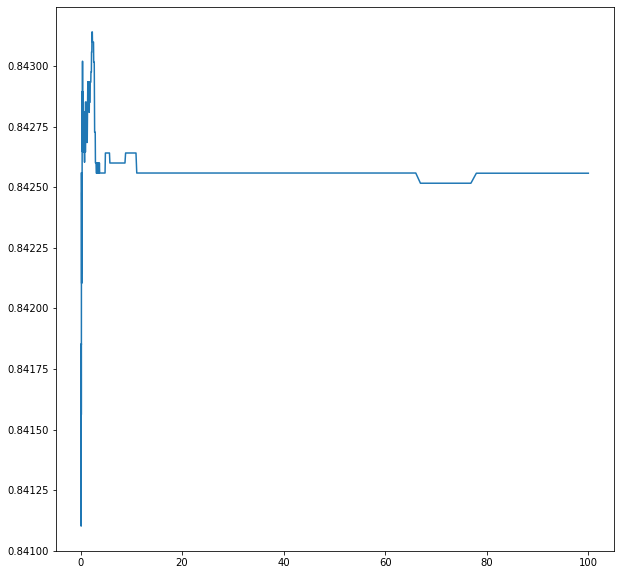

In [43]:
figure = plt.figure(figsize=(10, 10))
plt.plot(interval, avg_roc_auc)
plt.show()

### 2.5
С помощью метода C_ того же объекта выведите лучшее значение C. Выведите более конкретную область графика (область ~15 точкам по x), включающую лучшее значение C.

*Примечание: используйте plt.xlim.*

[2.25271064]


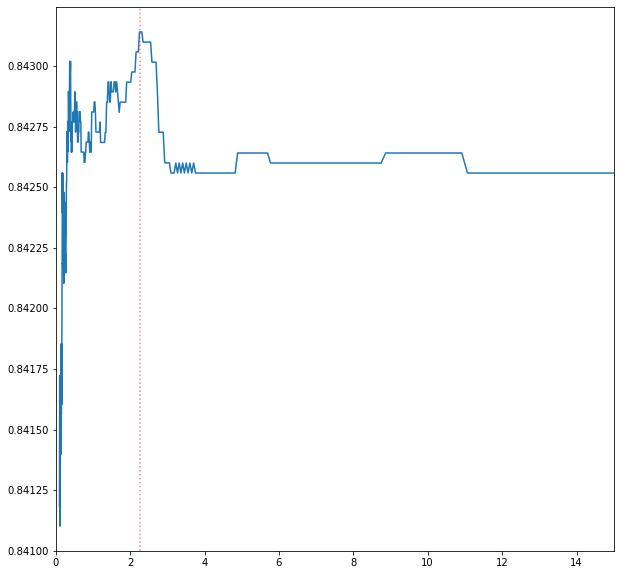

In [44]:
print(lr.C_)
fig = plt.figure(figsize=(10, 10))
plt.plot(interval, avg_roc_auc)
plt.xlim((0, 15))
plt.axvline(x=lr.C_, c='r', linestyle=':', alpha=0.5)
plt.show()

### 2.6
С помощью метода predict_proba получите вероятности принадлежности объектов тестовой выборки к классам. Постройте график roc_auc для тестовой выборки и выведите значение auc.

**Пример** построения графика.

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = 0.9059300624916901


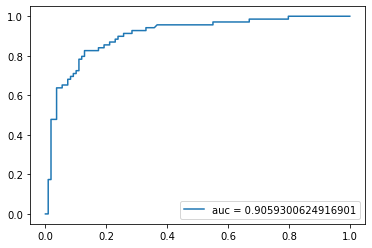

In [46]:
proba = lr.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, proba)

auc = roc_auc_score(y_test, proba)
print(f"auc = {auc}")

plt.plot(fpr, tpr, label="auc = " + str(auc))
plt.legend(loc=4)
plt.show()